In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

In [2]:
df = pd.read_csv('D:/Belajar python/carbon-emission-prediction/my2015-2019-fuel-consumption-ratings.csv', encoding='latin1', index_col=False)
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2015,Acura,ILX,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compact,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            5431 non-null   int64  
 1   Make                  5431 non-null   object 
 2   Model                 5431 non-null   object 
 3   Vehicle class         5431 non-null   object 
 4   Engine size (L)       5431 non-null   float64
 5   Cylinders             5431 non-null   int64  
 6   Transmission          5431 non-null   object 
 7   Fuel type             5431 non-null   object 
 8   City (L/100 km)       5431 non-null   float64
 9   Highway (L/100 km)    5431 non-null   float64
 10  Combined (L/100 km)   5431 non-null   float64
 11  Combined (mpg)        5431 non-null   int64  
 12  CO2 emissions (g/km)  5431 non-null   int64  
 13  CO2 rating            4303 non-null   float64
 14  Smog rating           3197 non-null   float64
dtypes: float64(6), int64(

In [4]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [5]:
# Drop co2 rating and smog rating
df.drop(['CO2 rating', 'Smog rating'], axis=1, inplace=True)

In [6]:
df.isna().sum()

Model year              0
Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Transmission' ].value_counts()

AS6     1061
AS8      915
M6       684
A6       506
AM7      356
A8       317
A9       257
AS7      234
AV       199
M5       140
AM6      116
AS10     110
AV7       98
AV6       94
M7        81
A5        53
AS9       50
A7        39
AM8       39
AV8       25
A4        19
AS5       14
A10       12
AV10       6
AM9        3
AM5        2
AS4        1
Name: Transmission, dtype: int64

Transmission are consist of type of transmission and number of gears so we need to split it

In [9]:
df.iloc[2715,:]

Model year                         2017
Make                              Honda
Model                   Civic Hatchback
Vehicle class                 Full-size
Engine size (L)                     1.5
Cylinders                             4
Transmission                         AV
Fuel type                             X
City (L/100 km)                     7.7
Highway (L/100 km)                  6.0
Combined (L/100 km)                 6.9
Combined (mpg)                       41
CO2 emissions (g/km)                162
Name: 2715, dtype: object

In [10]:
df.iloc[2716,6]

'AV7'

In [11]:
import re

def get_alpha(text):
    return re.sub(r'[^a-zA-Z]', '', text)

def get_num(text):
    if text.isalpha():
        return int(0)
    else:
        return int(re.sub(r'[^0-9]', '', text))

df['Gears'] = df['Transmission'].apply(get_num)
df['Transmission'] = df['Transmission'].apply(get_alpha)

In [12]:
# Defining categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

## EDA

In [13]:
df['Fuel type'].value_counts()

X    2678
Z    2376
E     255
D     121
N       1
Name: Fuel type, dtype: int64

<Figure size 1500x1000 with 0 Axes>

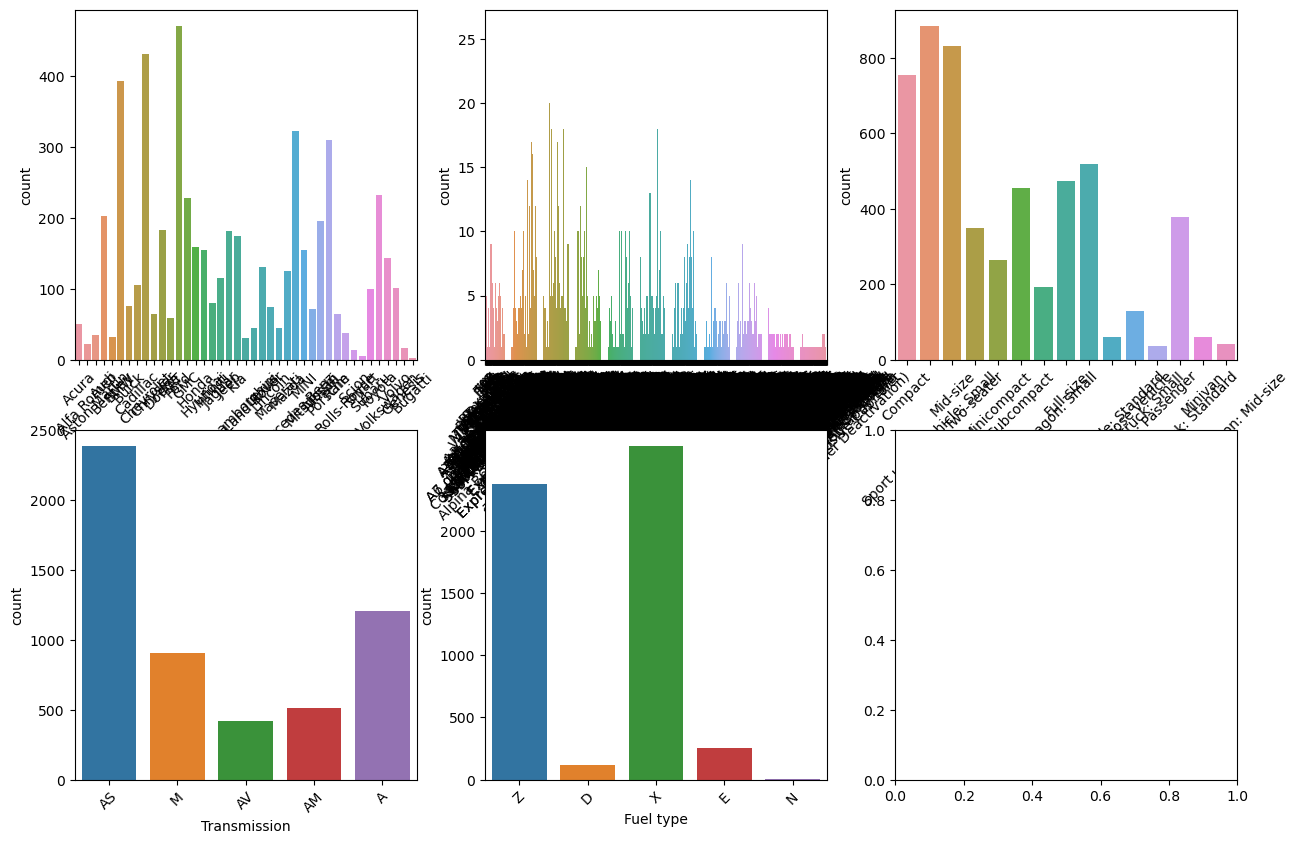

In [14]:
n = len(cat_cols)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

<Figure size 1500x1000 with 0 Axes>

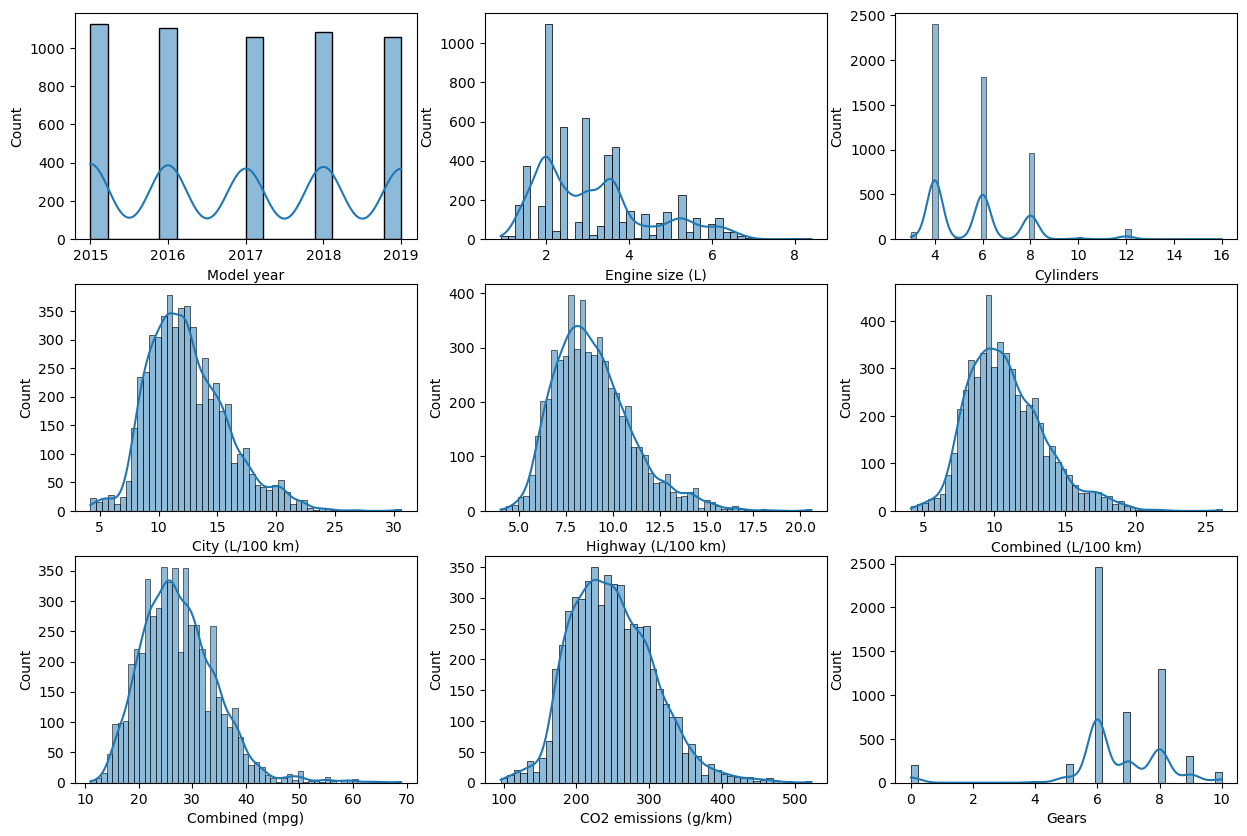

In [15]:
n = len(num_cols)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True)

In [16]:
num_cols

Index(['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'Gears'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

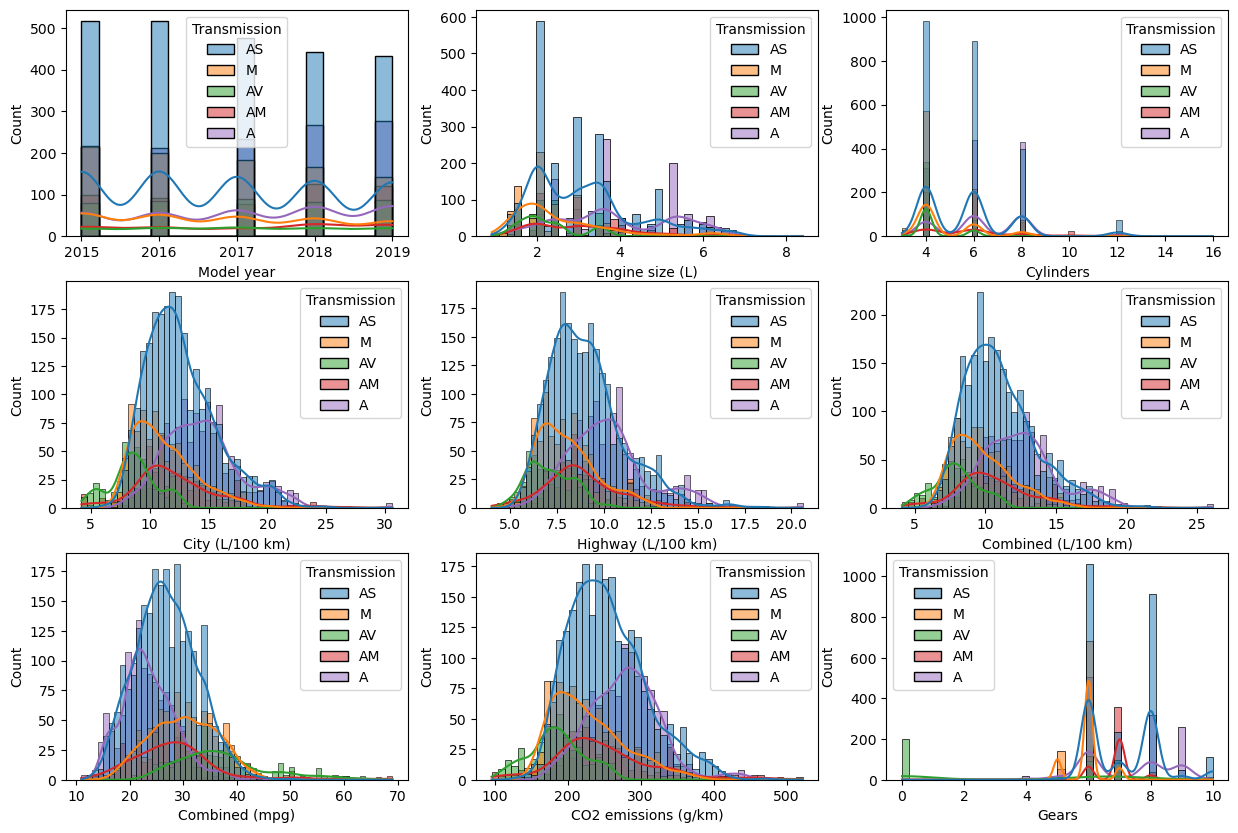

In [17]:
n = len(num_cols)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(x=col,hue='Transmission', data=df, kde=True, ax=axes[i])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19828\224325120.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


<Axes: >

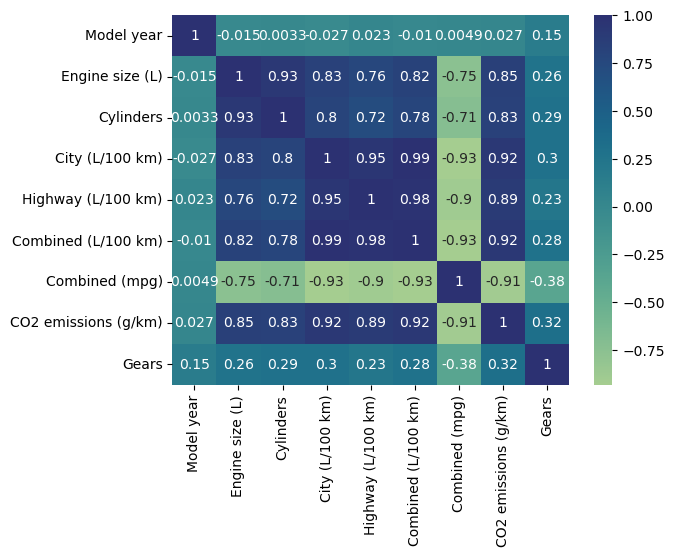

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='crest')

## Data Splitting

In [19]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'Gears'],
      dtype='object')

In [20]:
X = df.drop('CO2 emissions (g/km)', axis=1)
y = df['CO2 emissions (g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4344, 13), (1087, 13), (4344,), (1087,))

In [64]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(target_type='continuous'))
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipe, num_cols),
    ('categorical', cat_pipe, cat_cols)
],remainder = "drop",verbose_feature_names_out=False).set_output(transform="pandas")

prep_pipeline = Pipeline([
    ("preprocessor",preprocessor)
])
prep_pipeline.fit_transform(X_train,y_train)

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),Gears,Make,Model,Vehicle class,Transmission,Fuel type
5015,1.432157,0.283080,0.233908,-0.072227,0.021433,-0.026467,-0.231843,0.797403,249.611063,257.279390,237.408184,254.800132,234.033094
1612,-0.693085,1.624491,1.328252,0.817013,0.876058,0.840154,-0.937510,-0.371655,297.262865,304.562794,304.075289,279.491461,233.828434
2683,0.015329,2.295196,1.328252,1.054143,1.303370,1.165137,-1.078643,0.797403,294.872593,313.269209,301.075734,277.101518,265.220829
652,-1.401499,-1.132853,-0.860435,-1.109673,-1.213025,-1.145852,1.320623,-0.371655,219.929410,177.525907,217.923447,229.076082,234.473070
3229,0.015329,-0.313102,-0.860435,-0.101868,0.543704,0.117970,-0.372977,-0.371655,224.712540,268.511818,277.899361,254.509981,234.949186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.723743,1.624491,1.328252,2.921546,3.202537,3.042815,-1.784310,-0.371655,297.262865,317.441660,304.075289,279.491461,267.419242
5191,1.432157,0.432126,0.233908,0.164904,0.353787,0.226298,-0.372977,0.212874,232.679803,272.829301,277.511339,252.716346,264.124837
5226,1.432157,1.848059,1.328252,0.817013,1.018496,0.912372,-0.937510,0.212874,236.301358,334.411474,302.141023,254.459626,234.106061
5390,1.432157,-1.207376,-0.860435,-1.376445,-1.165545,-1.326398,1.602890,-0.956184,224.712540,169.533474,217.960495,229.106807,234.949186


In [68]:
# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'LGBM': lgb.LGBMRegressor(random_state=42),
}

error_eval = {
    'Random Forest': None,
    'Decision Tree': None,
    'Linear Regression': None,
    'LGBM': None
}

# Iterate over models
models_name = list(models.keys())
r_2_scores = []
mse_scores = []

for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('algo', model)
    ])
    
    print(f"Evaluating {name}...")
    # Train model
    pipe.fit(X_train, y_train)
    # Predict
    y_pred = pipe.predict(X_test)
    error_eval[name] = y_pred
    # Evaluate
    r_2 = r2_score(y_test, y_pred)
    mse_ = mean_squared_error(y_test, y_pred)
    r_2_scores.append(r_2)
    mse_scores.append(mse_)
    print(f"r square score: {r_2:.4f}")
    print(f"Mean Squared Error: {mse_:.4f}\n")

eval_df = pd.DataFrame({
    'Model': models_name,
    'R2 Score': r_2_scores,
    'MSE': mse_scores
})

Evaluating Random Forest...
r square score: 0.9978
Mean Squared Error: 7.0093

Evaluating Decision Tree...
r square score: 0.9962
Mean Squared Error: 12.1297

Evaluating Linear Regression...
r square score: 0.9346
Mean Squared Error: 209.6344

Evaluating LGBM...
r square score: 0.9965
Mean Squared Error: 11.3042



In [69]:
error_eval

{'Random Forest': array([250.  , 285.93, 260.05, ..., 254.39, 301.28, 230.  ]),
 'Decision Tree': array([250., 285., 258., ..., 253., 302., 230.]),
 'Linear Regression': array([256.63382225, 280.12877596, 259.64352096, ..., 250.09772145,
        286.37769662, 230.13740998]),
 'LGBM': array([250.96524079, 285.73466196, 260.83549895, ..., 253.46236976,
        299.26755717, 230.37918261])}

In [53]:
eval_df

,Model,R2 Score,MSE
0,Random Forest,0.997829,6.962318
1,Decision Tree,0.991293,27.921803
2,Linear Regression,0.934669,209.495492
3,LGBM,0.996183,12.241355


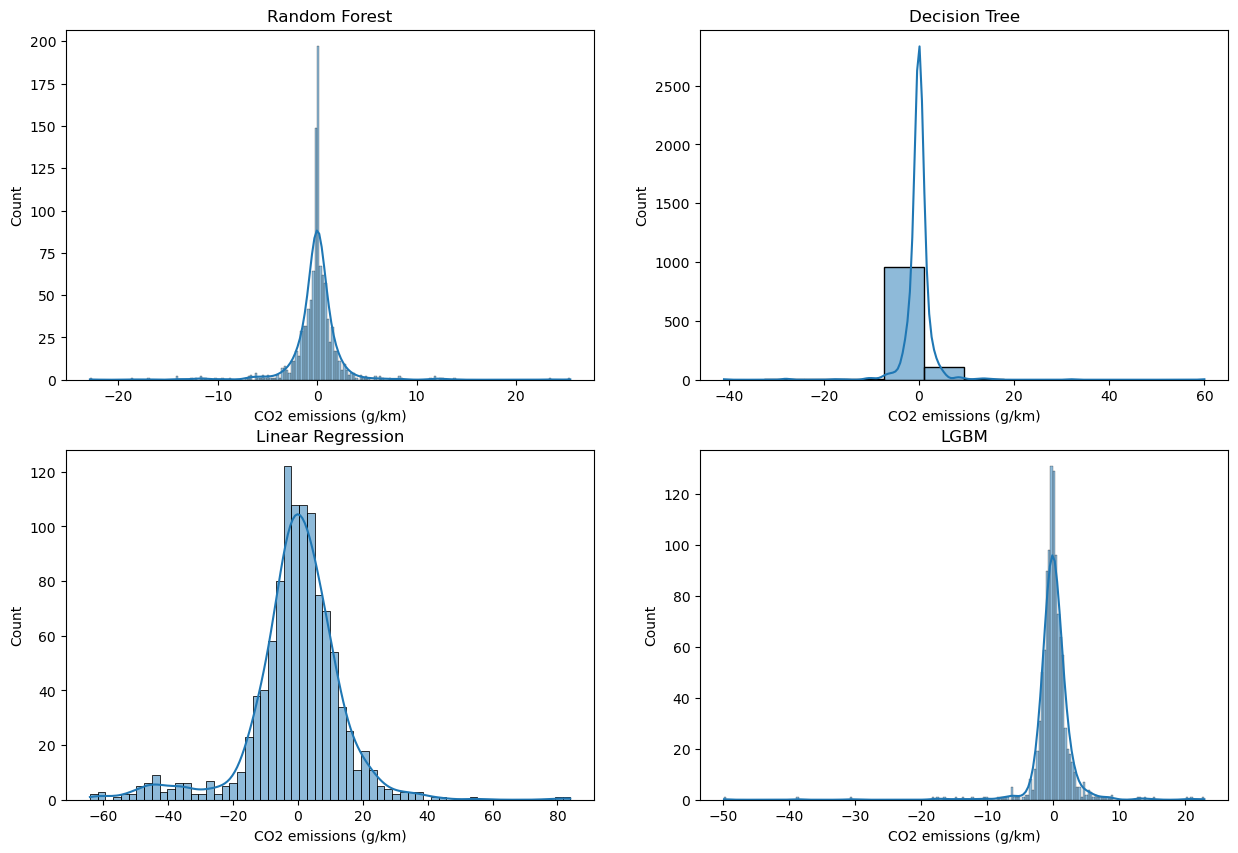

In [72]:
# plotting the error
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
axes = ax.flatten()

for i, (name, error) in enumerate(error_eval.items()):
    sns.histplot(y_test - error, kde=True, ax=axes[i])
    axes[i].set_title(name)